Le but de cet etude est de predire le prix median des maisons.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(7,5)})

In [3]:
housing = pd.read_csv("housing.csv")

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.shape

(20640, 10)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
list(housing.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

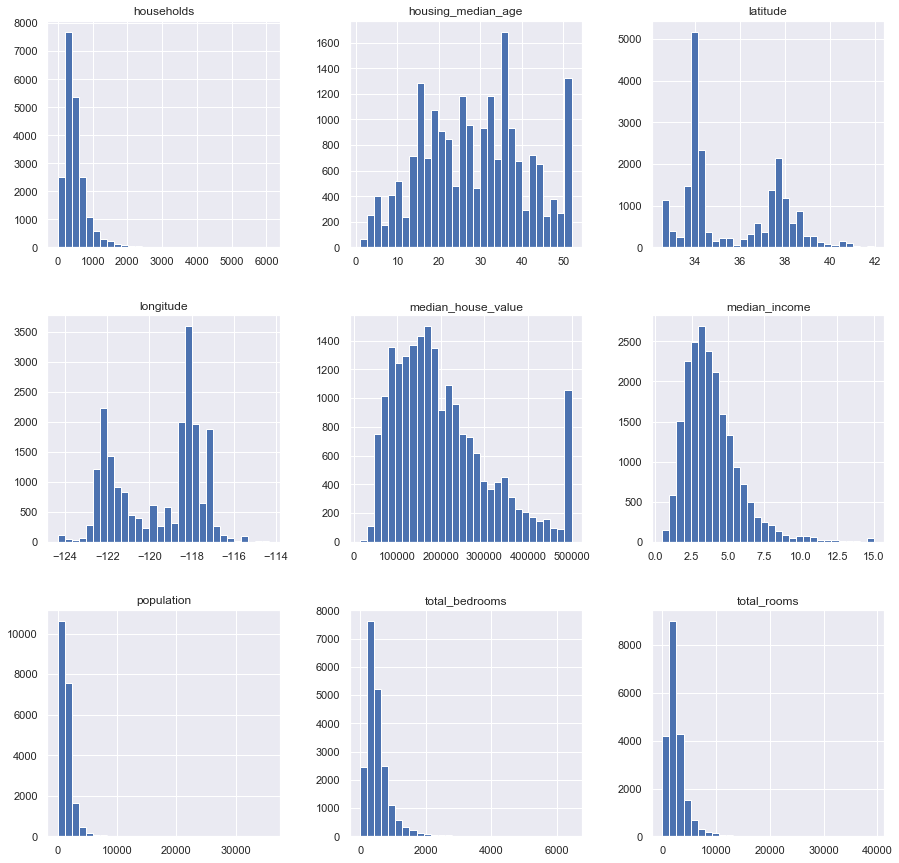

In [8]:
housing.hist(figsize=(15,15),bins=30);

In [9]:
(housing.median_income).describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [10]:
housing.median_income[housing.median_income > 10].count()

308

In [11]:
housing.median_income.mode()

0     3.1250
1    15.0001
dtype: float64

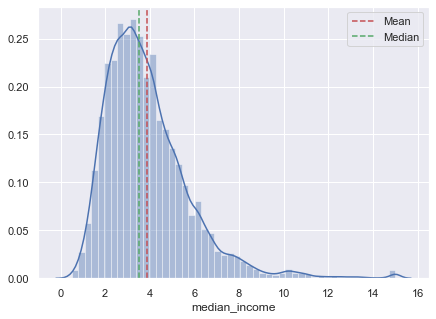

In [12]:
mean = housing.median_income.mean()
median = housing.median_income.median()

sns.distplot(housing.median_income)
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='--')

plt.legend({'Mean':mean,'Median':median})

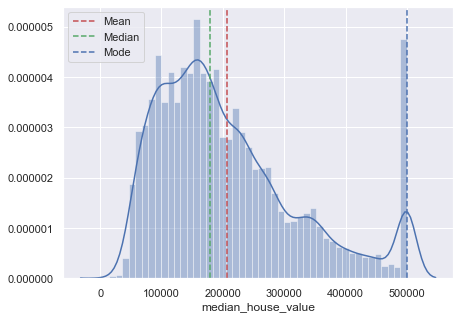

In [13]:
mean = housing.median_house_value.mean()
median = housing.median_house_value.median()
mode = housing.median_house_value.mode()[0]

sns.distplot(housing.median_house_value)
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='--')
plt.axvline(mode, color='b', linestyle='--')

plt.legend({'Mean':mean,'Median':median, 'Mode':mode})

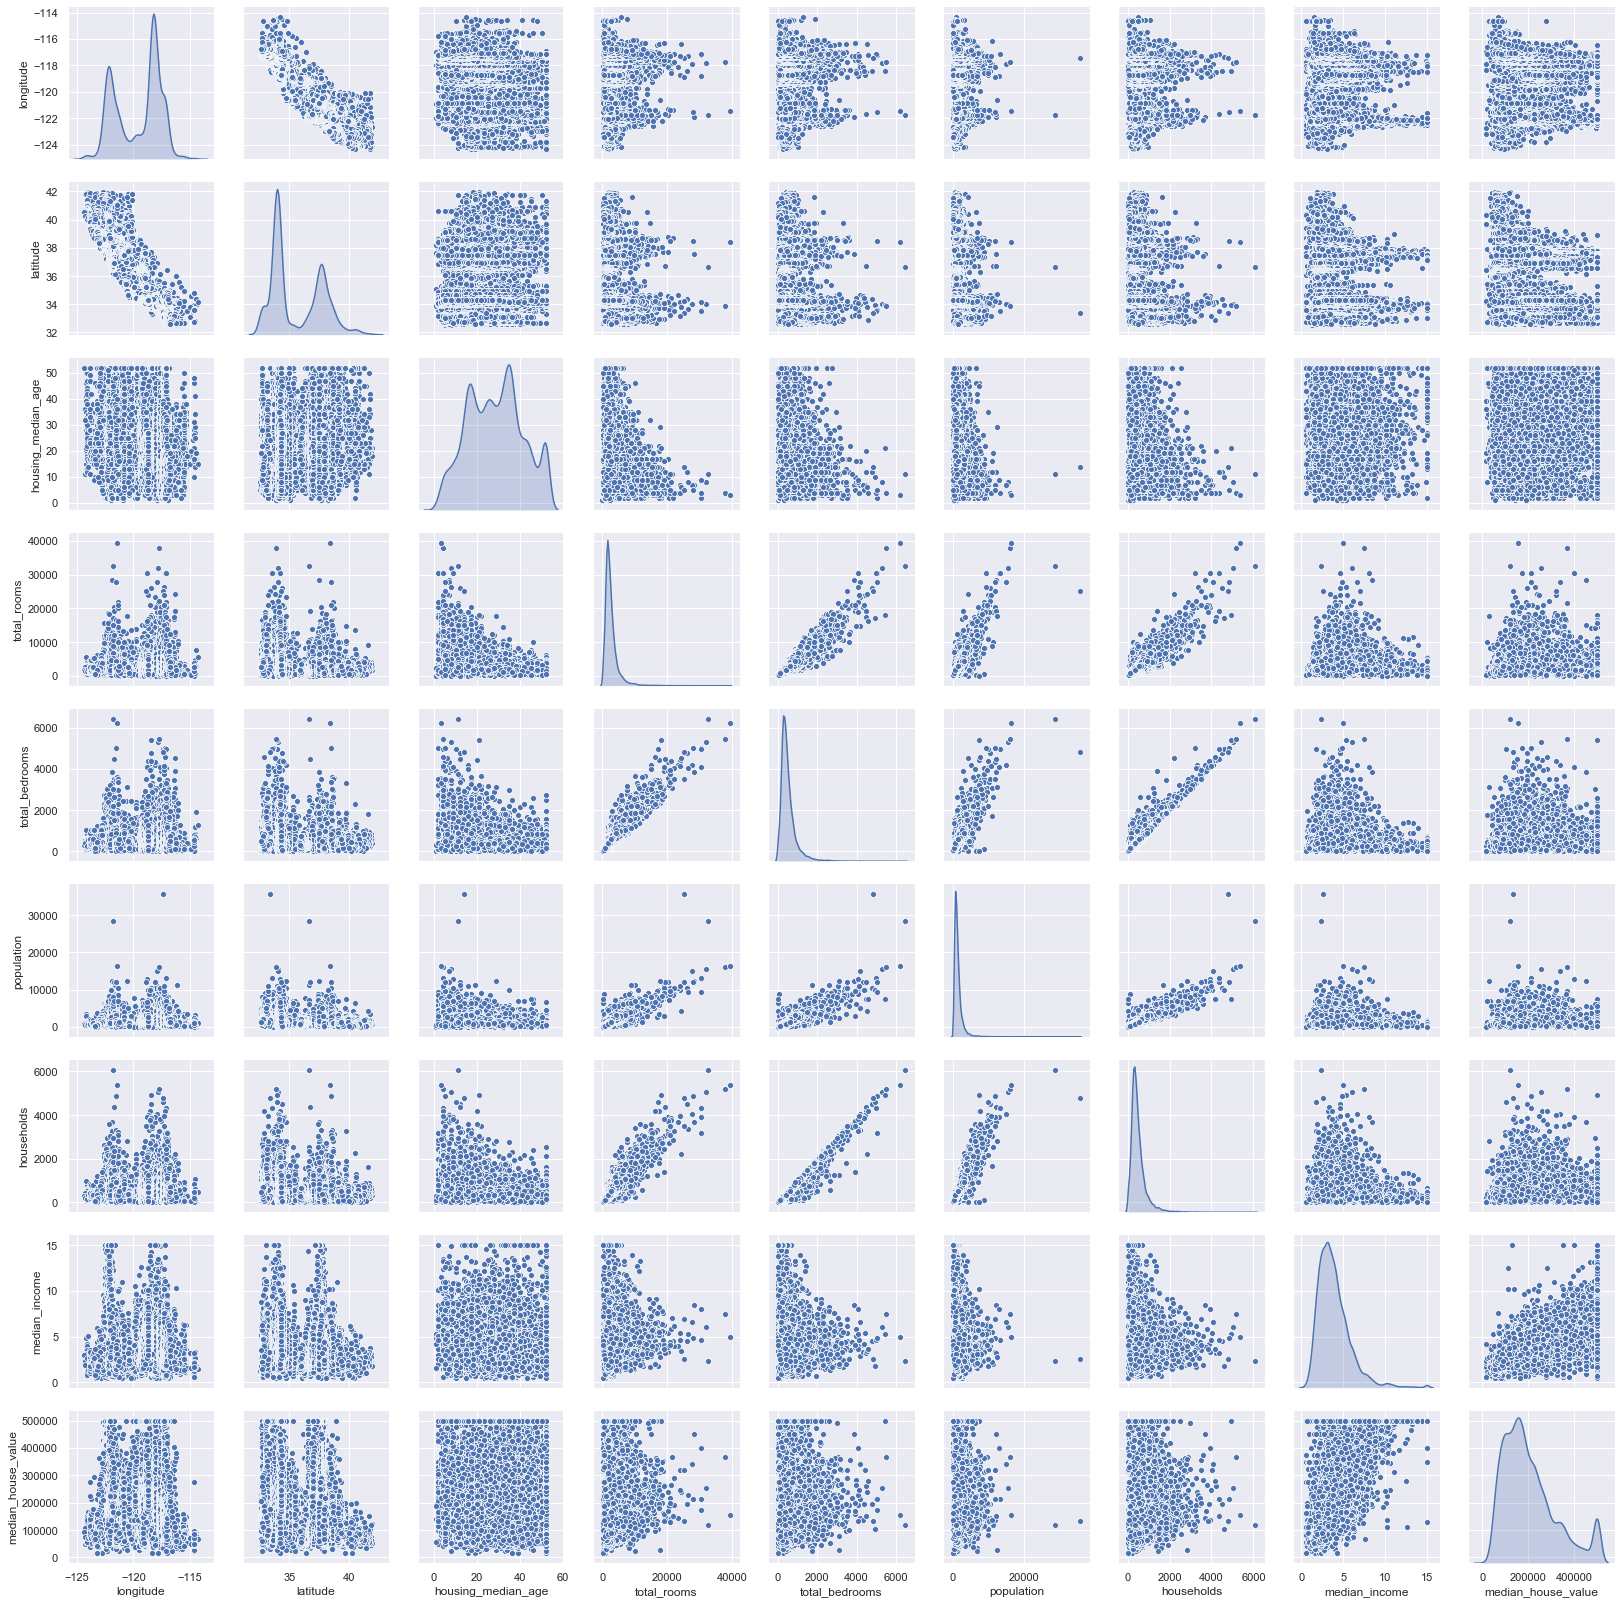

In [14]:
sns.pairplot(housing, diag_kind = "kde")
#sns.pairplot(housing, hue = "ocean_proximity", palette = "husl")

In [15]:
proximity_list = list(housing.ocean_proximity.unique())

In [16]:
proximity_list

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

No handles with labels found to put in legend.


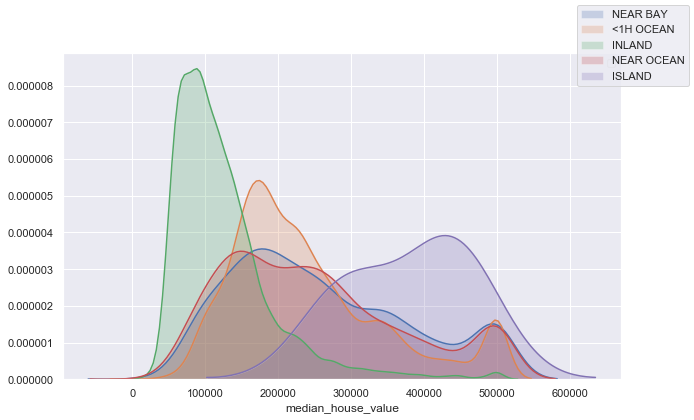

In [17]:
fig = plt.figure(figsize=(10,6))

for label in proximity_list:
    sns.distplot(
        housing.median_house_value[housing.ocean_proximity == label],
        hist=False,
        kde_kws={"shade": True})

fig.legend(labels=proximity_list)
plt.legend()

In [18]:
(housing.median_house_value[housing.ocean_proximity == '<1H OCEAN']).mean()

240084.28546409807

In [19]:
(housing.median_house_value[housing.ocean_proximity == 'NEAR OCEAN']).mean()

249433.97742663656

In [20]:
(housing.median_house_value[housing.ocean_proximity == 'ISLAND']).mean()

380440.0

In [21]:
housing[housing.median_house_value > 500000].count()

longitude             965
latitude              965
housing_median_age    965
total_rooms           965
total_bedrooms        958
population            965
households            965
median_income         965
median_house_value    965
ocean_proximity       965
dtype: int64

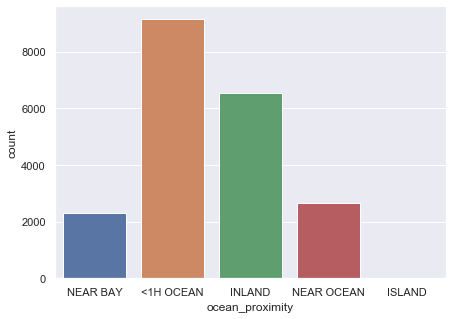

In [22]:
sns.countplot(housing.ocean_proximity)

In [23]:
# GROUP BY
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

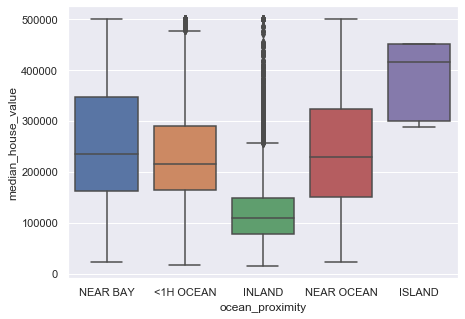

In [24]:
sns.boxplot(housing.ocean_proximity,
            housing.median_house_value)

In [25]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [26]:
housing.total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

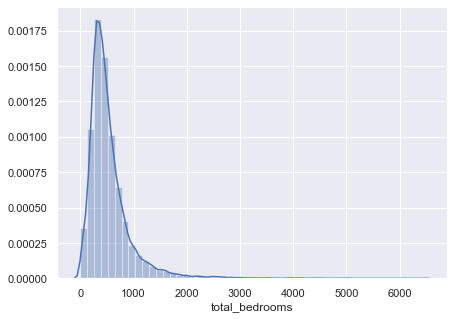

In [27]:
sns.distplot(housing[housing['total_bedrooms'].notnull()]['total_bedrooms'])

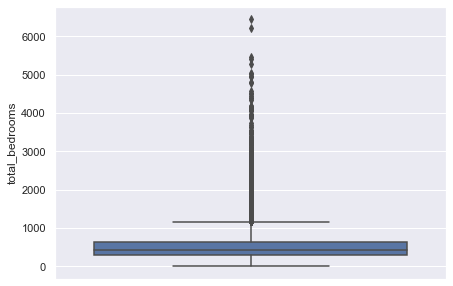

In [28]:
sns.boxplot(housing.total_bedrooms, orient = "v")

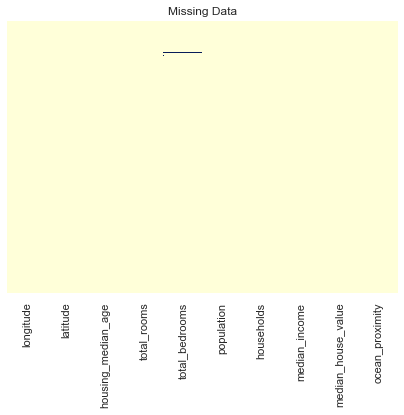

In [29]:
sns.heatmap(housing.isnull(), cmap="YlGnBu", cbar=False, yticklabels=False)

plt.title('Missing Data')
plt.show()

In [30]:
housing[housing['total_bedrooms'].isnull()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


On veut remplacer les valeurs NaN avec la moyenne des total_bedrooms

In [31]:
housing.total_bedrooms[housing.total_bedrooms.isnull()]

290     NaN
341     NaN
538     NaN
563     NaN
696     NaN
         ..
20267   NaN
20268   NaN
20372   NaN
20460   NaN
20484   NaN
Name: total_bedrooms, Length: 207, dtype: float64

In [32]:
# missing data filled with mean => not the best because data is skewed (too many outliers)
# housing.total_bedrooms[housing.total_bedrooms.isnull()] = np.mean(housing['total_bedrooms'])

# missing data filled with median base on ocean_proximity
ocean_proximity_area = housing.ocean_proximity.unique()

print("N° of NaN values before filling: "+str(housing.total_bedrooms.isnull().sum()))

print("*****")
for area in ocean_proximity_area:
    print(area)
    filter_area = housing.ocean_proximity == area
    bedrooms_per_area = housing[filter_area].total_bedrooms 
    median_bedrooms_per_area = bedrooms_per_area.median()
    print("N° of NaN values before filling: "+str(bedrooms_per_area.isnull().sum()))
    housing.loc[filter_area,'total_bedrooms'] = bedrooms_per_area.fillna(median_bedrooms_per_area)
    print("N° of NaN values after filling: "+str(housing[filter_area].total_bedrooms.isnull().sum()))
    
print("*****")
print("N° of NaN values after filling: "+str(housing.total_bedrooms.isnull().sum()))

N° of NaN values before filling: 207
*****
NEAR BAY
N° of NaN values before filling: 20
N° of NaN values after filling: 0
<1H OCEAN
N° of NaN values before filling: 102
N° of NaN values after filling: 0
INLAND
N° of NaN values before filling: 55
N° of NaN values after filling: 0
NEAR OCEAN
N° of NaN values before filling: 30
N° of NaN values after filling: 0
ISLAND
N° of NaN values before filling: 0
N° of NaN values after filling: 0
*****
N° of NaN values after filling: 0


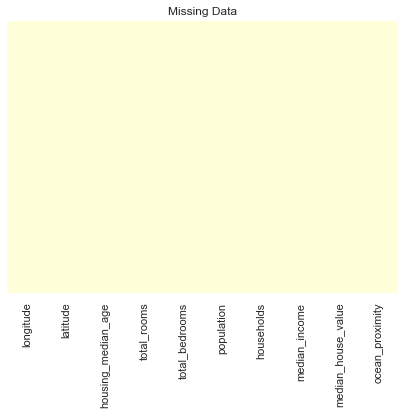

In [33]:
sns.heatmap(housing.isnull(), cmap="YlGnBu", cbar=False, yticklabels=False)

plt.title('Missing Data')
plt.show()

In [34]:
housing.loc[290]

longitude              -122.16
latitude                 37.77
housing_median_age          47
total_rooms               1256
total_bedrooms             423
population                 570
households                 218
median_income            4.375
median_house_value      161900
ocean_proximity       NEAR BAY
Name: 290, dtype: object

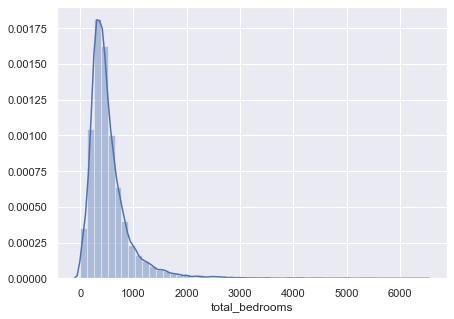

In [35]:
sns.distplot(housing.total_bedrooms)

In [36]:
housing.total_bedrooms.describe()

count    20640.000000
mean       536.852229
std        419.390765
min          1.000000
25%        297.000000
50%        435.000000
75%        643.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

Removing outliers from target column

In [37]:
housing[housing['median_house_value']>450000]['median_house_value'].value_counts().head()

500001.0    965
500000.0     27
475000.0      8
483300.0      6
466700.0      4
Name: median_house_value, dtype: int64

In [38]:
housing=housing.loc[housing['median_house_value']<500001,:]

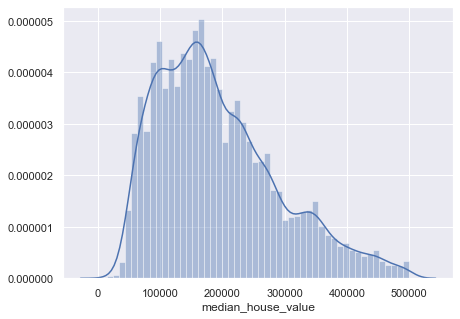

In [39]:
sns.distplot(housing.median_house_value)

In [40]:
'''
plt.figure(figsize=(10,6))
plt.scatter(housing['longitude'],
            housing['latitude'],
            c=housing['median_house_value'],  # color
            s=housing['population']/80,  # dot size
            label="population",
            cmap='coolwarm')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Prix par rapport à la position geographique')
plt.legend()
plt.show()
'''

'\nplt.figure(figsize=(10,6))\nplt.scatter(housing[\'longitude\'],\n            housing[\'latitude\'],\n            c=housing[\'median_house_value\'],  # color\n            s=housing[\'population\']/80,  # dot size\n            label="population",\n            cmap=\'coolwarm\')\nplt.colorbar()\nplt.xlabel(\'longitude\')\nplt.ylabel(\'latitude\')\nplt.title(\'Prix par rapport à la position geographique\')\nplt.legend()\nplt.show()\n'

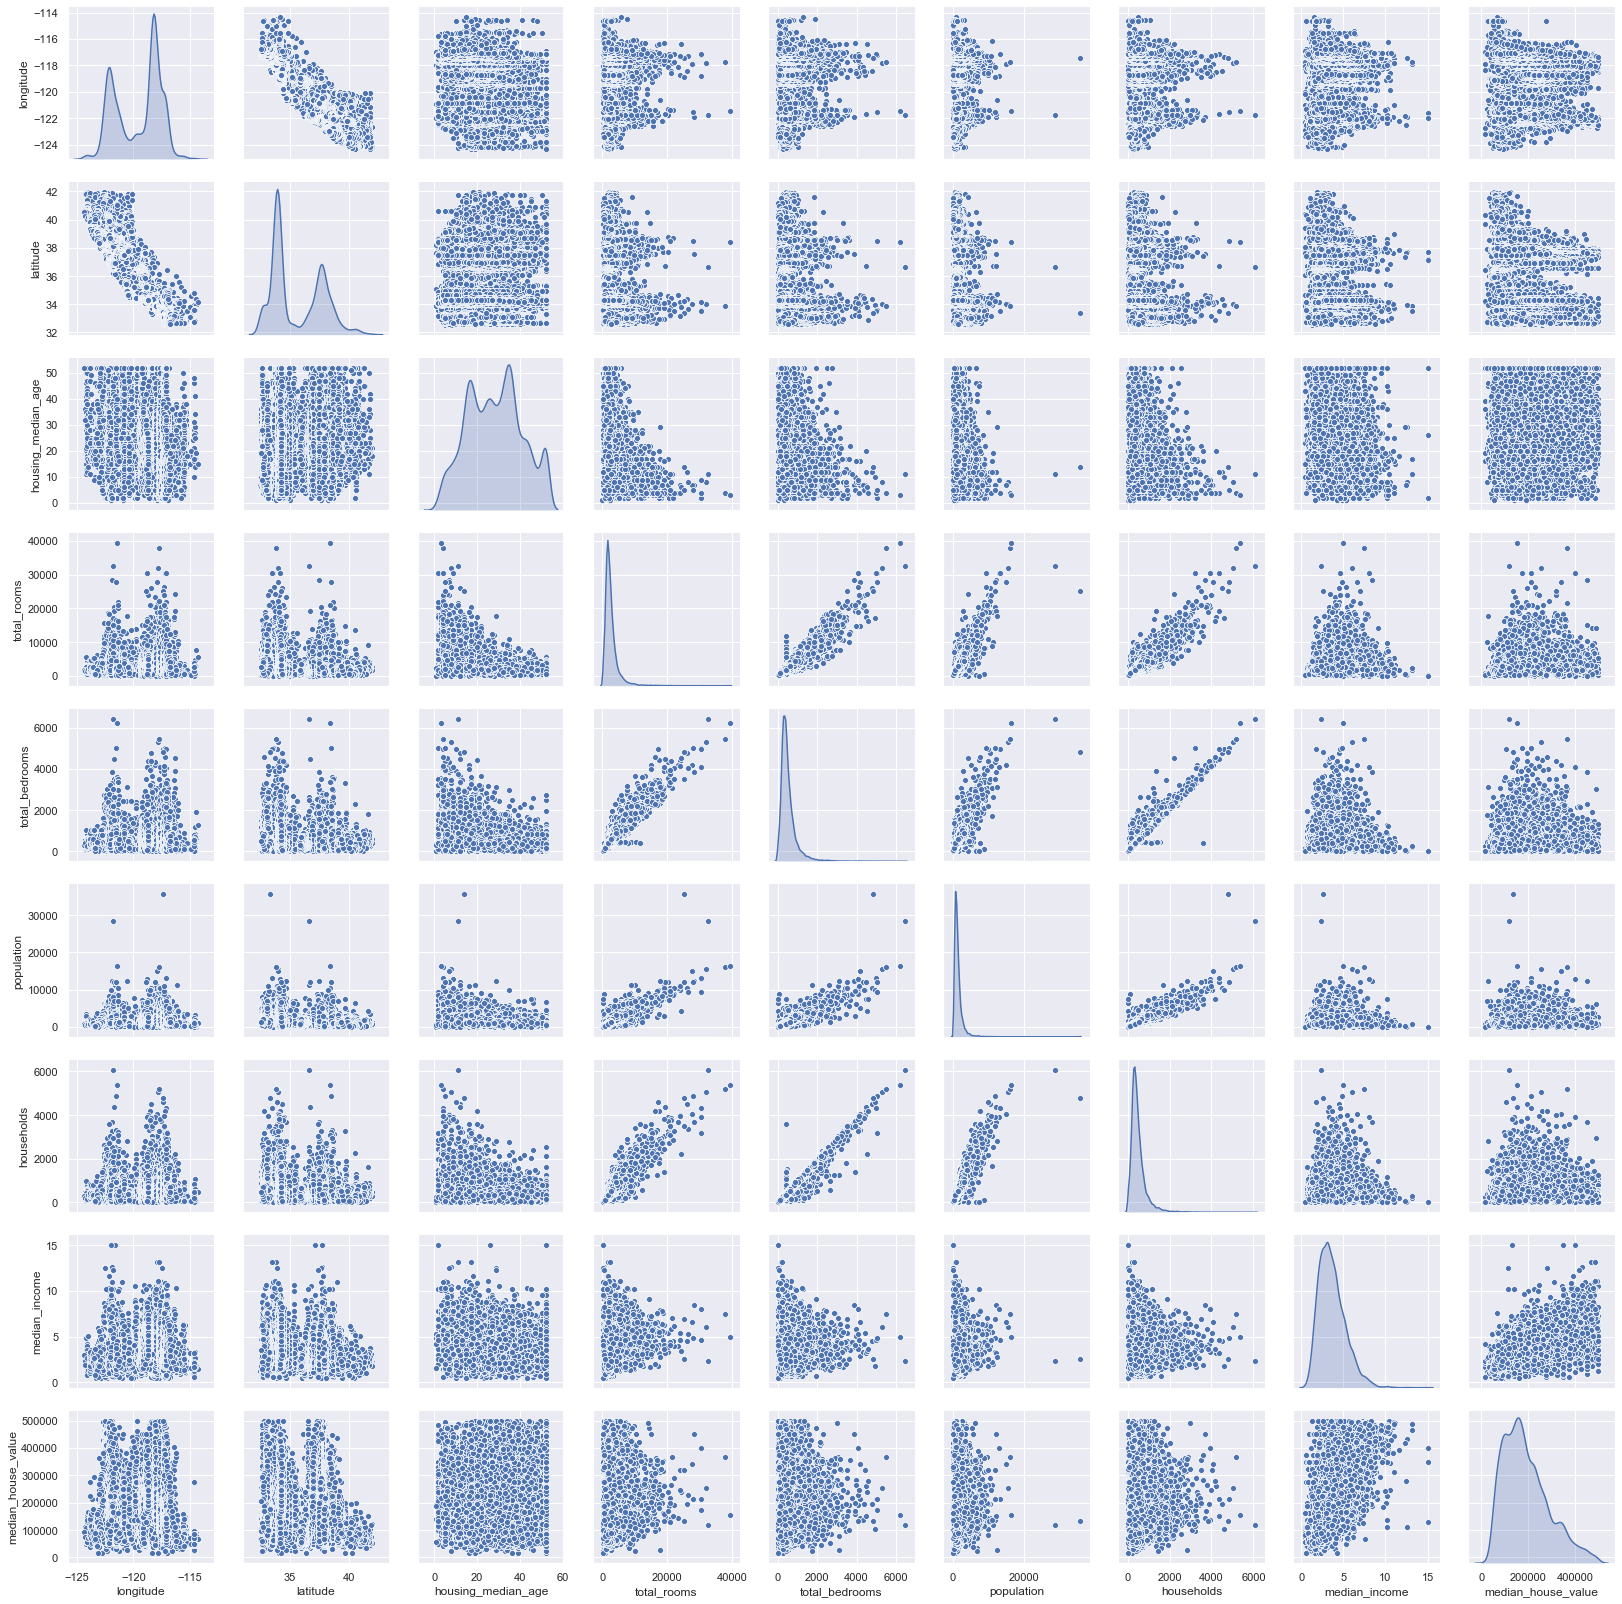

In [41]:
#sns.pairplot(housing, diag_kind = "kde")

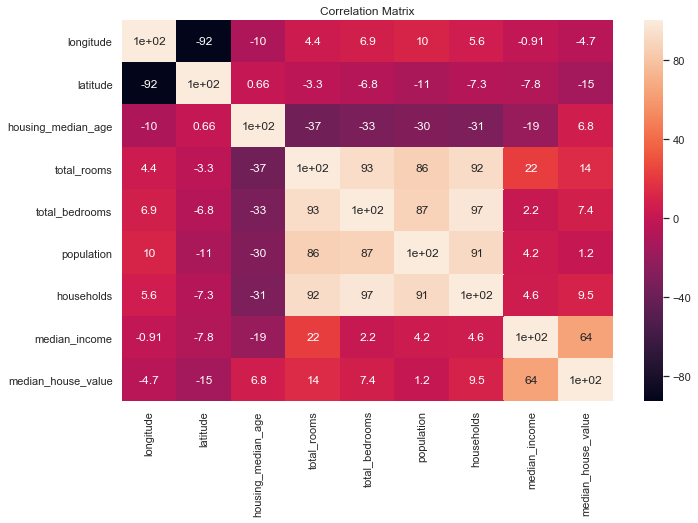

In [42]:
# We can also just show the pair plot

# !pip install matplotlib==3.1.0   # to solve the problem with the heatmap not well displaying
# Correlation matrix
plt.figure(figsize=(11,7))
sns.heatmap(housing.corr()*100,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [43]:
housing = pd.get_dummies(housing)

In [44]:
X = housing.drop('median_house_value',axis=1)
y = housing['median_house_value']

Maintenant, séparez votre dataset en un *train_set* et un *test_set*. On utilisera scikitlearn pour cela.

#### Pourquoi séparer les données ?
On sépare le dataset en train et test set afin de simuler la situation où l'on a pas les réponses. C'est essentielle afin de pouvoir évaluer les perfomances du modèles, afin de voir ce qu'il prédit sur des données qu'il ne connait pas et de les comparer à la réalité. Cela permet de voir si notre modèle est surentrainé (fait de l'overfiting), nous allons voir cette notion plus tard.

#### A quoi sert le random_state ?
Le random_state permet de séparer de la même manière les données. En effet, les performances d'un modèle peuvent dépendre des données qui ont été utilisées pour l'entrainement. Si les données changent,les performances du modèle changent. Pour s'assurer que les performances du modèle change grâce à un paramètre que l'on a modifié et non parce que le train est composé de différentes données, on fixe un random_state (la valeur importe peu)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000,13182.000000
mean,-119.580652,35.673357,28.415187,2617.623729,538.952814,1443.267562,501.335609,3.661831,0.434077,0.333713,0.000303,0.108557,0.123350
std,2.007152,2.153666,12.544656,2164.674589,417.367349,1113.012629,379.894071,1.562484,0.495654,0.471556,0.017418,0.311095,0.328851
min,-124.350000,32.540000,1.000000,2.000000,2.000000,5.000000,2.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.780000,33.940000,18.000000,1439.250000,298.000000,801.000000,281.000000,2.519500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.540000,34.280000,28.000000,2113.500000,438.000000,1184.500000,413.000000,3.429850,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.000000,37.730000,37.000000,3121.750000,644.000000,1751.000000,606.000000,4.562500,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,37937.000000,5471.000000,16122.000000,5189.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
from sklearn.preprocessing import StandardScaler #see doc here
#X_train_scaled = (X - moyenne) / standart_deviation => toute les données auront une moyenne de 0 et un écart-type de 1
scaler = StandardScaler()
scaler.fit(X_train) #calcul la moyenne et l'écart-type de X_train
X_train_scaled = scaler.transform(X_train) # retourne les données X_train scalées (on peut utiliser 'fit_transform' pour Xtrain)
X_test_scaled = scaler.transform(X_test) # retourne les données X_test scalées en utilisant 
#les paramètres (la moyenne et l'écart type) calculés à partir des données du X_train. Encore une fois, 
#il s'agit de simuler le fait que l'on ne connaisse pas les données du X_train
print(f' moyenne de :\n{scaler.mean_}\net écart-type de :\n {scaler.var_}')

 moyenne de :
[-1.19580652e+02  3.56733569e+01  2.84151874e+01  2.61762373e+03
  5.38952814e+02  1.44326756e+03  5.01335609e+02  3.66183147e+00
  4.34076771e-01  3.33712638e-01  3.03444090e-04  1.08557123e-01
  1.23350023e-01]
et écart-type de :
 [4.02835202e+00 4.63792479e+00 1.57356447e+02 4.68546061e+06
 1.74182290e+05 1.23870314e+06 1.44308557e+05 2.44116997e+00
 2.45654128e-01 2.22348513e-01 3.03352012e-04 9.67724743e-02
 1.08134795e-01]


In [48]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.318200e+04,1.318200e+04,1.318200e+04,1.318200e+04,1.318200e+04,1.318200e+04,1.318200e+04,1.318200e+04,1.318200e+04,1.318200e+04,1.318200e+04,1.318200e+04,1.318200e+04
mean,9.162254e-15,-7.174675e-16,-5.811363e-18,-5.811363e-17,7.765329e-17,-8.942761e-17,-3.565987e-17,-1.698602e-16,5.405157e-16,1.416339e-15,-1.206357e-15,1.814518e-15,-5.365910e-16
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.376267e+00,-1.454950e+00,-2.185491e+00,-1.208368e+00,-1.286572e+00,-1.292278e+00,-1.314457e+00,-2.023734e+00,-8.757991e-01,-7.077103e-01,-1.742229e-02,-3.489654e-01,-3.751082e-01
25%,-1.095797e+00,-8.048707e-01,-8.302805e-01,-5.443859e-01,-5.773378e-01,-5.770751e-01,-5.800142e-01,-7.311275e-01,-8.757991e-01,-7.077103e-01,-1.742229e-02,-3.489654e-01,-3.751082e-01
50%,5.184919e-01,-6.469944e-01,-3.309801e-02,-2.328954e-01,-2.418892e-01,-2.325017e-01,-2.325358e-01,-1.484753e-01,-8.757991e-01,-7.077103e-01,-1.742229e-02,-3.489654e-01,-3.751082e-01
75%,7.875401e-01,9.549862e-01,6.843662e-01,2.328966e-01,2.516995e-01,2.764965e-01,2.755199e-01,5.764558e-01,1.141814e+00,1.413007e+00,-1.742229e-02,-3.489654e-01,-3.751082e-01
max,2.626036e+00,2.914510e+00,1.880140e+00,1.631687e+01,1.181749e+01,1.318879e+01,1.233987e+01,7.256843e+00,1.141814e+00,1.413007e+00,5.739774e+01,2.865613e+00,2.665898e+00


In [52]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

print(f" R2 : {reg.score(X_train, y_train)*100}")

 R2 : 61.50403679742793


In [53]:
from sklearn.linear_model import LinearRegression
#Je créé deux instances de LinearRegression, une pour des données scalées et une autre pour des données non scalées
reg = LinearRegression()
reg_scaled = LinearRegression()

reg.fit(X_train, y_train)
reg_scaled.fit(X_train_scaled, y_train)

 # la méthode "score()"" de l'instance de l'object LinearRegression retourne le R2
print(f" R2 pour les données d'entrainnement scalées : {reg_scaled.score(X_train, y_train)} \n et non scalées {reg.score(X_train, y_train)}")

 R2 pour les données d'entrainnement scalées : -1.3718418457051078e+25 
 et non scalées 0.6150403679742793


Le code dessous sert uniquement à montrer que l'on peut faire la même chose avec la méthode r2_score de scikit-learn

In [54]:
from sklearn.metrics import r2_score
y_train_predict = reg.predict(X_train)
r2_score(y_train, y_train_predict)

0.6150403679742793

Affichez votre score R2 via scikitlearn sur vos données de test. Commentez les résultats de votre score. 

In [55]:
X_test_scaled = scaler.transform(X_test)
y_pred_from_scaled = reg_scaled.predict(X_test_scaled)
y_pred = reg.predict(X_test)

print(f" R2 pour les données de test scalées : {r2_score(y_test, y_pred_from_scaled)} \n\t\t\tet non scalées {r2_score(y_test, y_pred)}")

 R2 pour les données de test scalées : 0.6045387103004698 
			et non scalées 0.6043565683313308


In [56]:
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

62140.08624057497
60287.81319769863


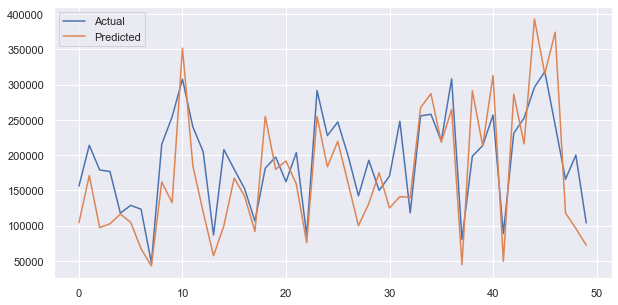

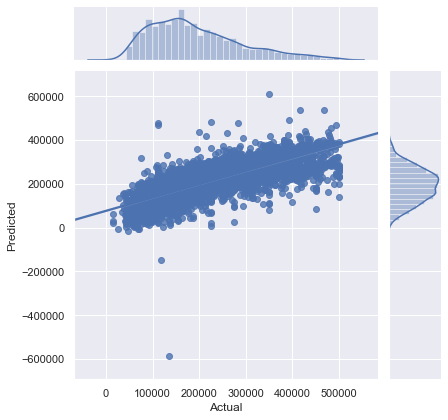

In [57]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(10,5))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [58]:
sorted({col:float(coef) for col,coef in zip(housing.columns,reg.coef_)}.items(), key=lambda kv: kv[1])

[('ocean_proximity_<1H OCEAN', -68160.01395677702),
 ('ocean_proximity_ISLAND', -36334.954716970475),
 ('median_house_value', -28035.256975994147),
 ('ocean_proximity_NEAR BAY', -23846.474847499827),
 ('longitude', -23360.869109976105),
 ('latitude', -21748.430802858453),
 ('population', -35.73141421557979),
 ('total_rooms', -4.769008130587744),
 ('total_bedrooms', 56.87854120352914),
 ('households', 81.82465962585246),
 ('housing_median_age', 921.8676290026316),
 ('median_income', 37581.90947790861),
 ('ocean_proximity_INLAND', 156376.7004972414)]

In [59]:
dropcol = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households", 'ocean_proximity_<1H OCEAN','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY', 'ocean_proximity_INLAND', "ocean_proximity_NEAR OCEAN","median_house_value"]
X2 = housing.drop(dropcol,axis=1)
y2 = housing.median_house_value

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [60]:
X_train2.shape

(13182, 1)

In [61]:
print("X_train2 shape {} and size {}".format(X_train2.shape,X_train2.size))
print("X_test2 shape {} and size {}".format(X_test2.shape,X_test2.size))
print("y_train2 shape {} and size {}".format(y_train2.shape,y_train2.size))
print("y_test2 shape {} and size {}".format(y_test2.shape,y_test2.size))

X_train2 shape (13182, 1) and size 13182
X_test2 shape (6493, 1) and size 6493
y_train2 shape (13182,) and size 13182
y_test2 shape (6493,) and size 6493


In [62]:
linReg2 = LinearRegression()
linReg2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_train2_predict = linReg2.predict(X_train2)
r2_score(y_train2, y_train2_predict)

0.4124364759139021

In [64]:
y_pred2 = linReg2.predict(X_test2)
r2_score(y_test2, y_pred2)

0.4138619511559839

In [65]:
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print(np.sqrt(metrics.mean_squared_error(y_train2, y_train2_predict)))

75634.4805822648
74481.66033898112


Text(0, 0.5, ' Predicted median_house_value')

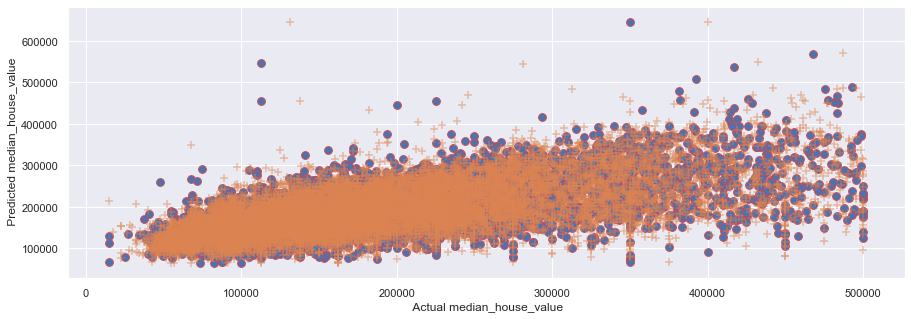

In [66]:
fig = plt.figure(figsize=(15,5))
plt.scatter(y_test2,y_pred2,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train2,y_train2_predict,marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

Posso mostrare come funziona la linear regression, però dicendo che questa ha dei limiti, in quanto quando i dati sono skewed allora non ho una buona performance (cercare qualcosa nella letteratura). Solo come esempio, posso fare vedere alla fine un altro modello (solo il risultato, senza spiegare l'algo) e dire che questo si presta meglio a questo tipo di problemi.

Plottare comunque la differenza tra le due predizioni per mostrare che l'andamento è simile ma che comunque non lo rispecchia a pieno e fare la differenza tra le due predizioni.

La linear regression si applica bene se ho qualcosa di tipo gaussiano, sennò non va bene (mostrare plot delle distribuzioni del predicted e actual)

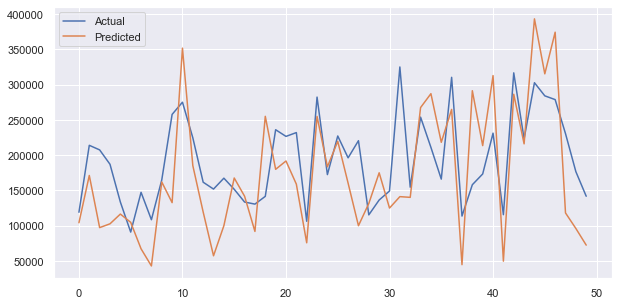

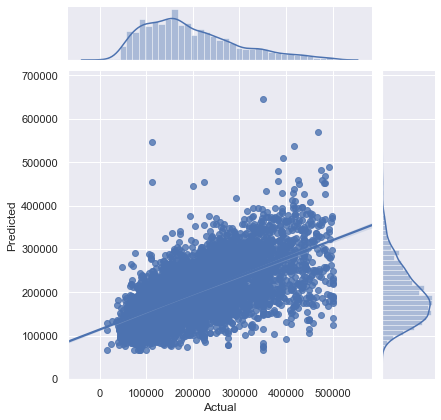

In [67]:
test = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
fig= plt.figure(figsize=(10,5))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);